# Part II - Avocado Sales Volume and Price Analysis
## by Sydney Russler



## Investigation Overview


In this investigation, I wanted to know the variables that could be used to predict the price of avocados. The main focus of the investigation was on the relationship between average price per unit, total volume sold, and seasonal variations.


## Dataset Overview

The data consisted of average price and volume of approximately 18,000 weeks of avocado sales per region. Each set of weekly data included the number of organic and conventional avocados, size of avocado, the date, the region, and the number of bags of varying sizes.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
avocados = pd.read_csv('avocados_clean.csv')

## Distribution of Total Volume by Unit

The volume of units of avocados sold in the dataset take on a very large range of values, from about 500 to 30 million units at the highest. Plotted on a logarithmic scale, the distribution of total volume takes on a multimodal shape.


In [4]:
def log_volume_hist(data):
    log_binsize = 0.025
    bins = 10 ** np.arange(2.4, np.log10(data['total_volume'].max())+log_binsize, log_binsize)

    plt.figure(figsize=[8, 5])
    plt.hist(data = data, x = 'total_volume', bins = bins, color='darkseagreen')
    plt.xscale('log')
    plt.xticks([100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000], 
           [100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '1 million', '3 million', '10 million', '30 million'], 
           rotation=45)
    plt.xlabel('Units Sold (Logarithmic Scale)')
    plt.title('Total Volume of Avocados Sold Weekly (by region), 2015-2018')
    plt.show()

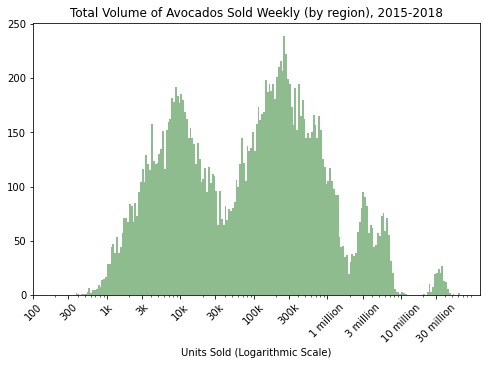

In [6]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "sub-slide"
    }
}

log_volume_hist(avocados)

## Distribution of Average Price Per Unit

The price of avocados per week per region is normally distributed with its peak between 1 and 1.25 dollars. The price ranges from a under 50 cents to above $3, but is mostly concentrated between 1 and 2 dollars per avocado.

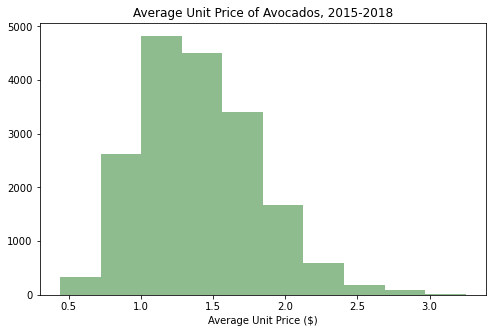

In [7]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "sub-slide"
    }
}

# histogram of average unit price of avocado
plt.figure(figsize=[8, 5])

plt.hist(data=avocados, x='average_price', color='darkseagreen')
plt.xlabel('Average Unit Price ($)')
plt.title('Average Unit Price of Avocados, 2015-2018');

## The Relationship Between Total Volume and Average Price

We can see the weak negative relationship with the price getting higher as the volume gets lower. However, the majority of the data is in cluster and doesn't seem to present a strong correlation.

In [9]:
def price_volume_scatter(data):
    plt.figure(figsize = [8, 6])

    # Create scatterplots of price vs. volume for both type
    # Data is very overplotted so alpha=1/20
    plt.scatter(data = data, x = 'average_price', y = 'total_volume', alpha = 1/25, color = 'seagreen')


    # Volume has large range so better represented by log scale
    plt.yscale('log')
    plt.yticks([100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000], 
           [100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '1 million', '3 million', '10 million', '30 million'])

    # Label and title plot
    plt.xlabel('Average Price ($)')
    plt.ylabel('Total Volume by Unit')
    plt.title('Average Price vs. Total Volume Sold for Avocados (2015-2018)')
    plt.show();

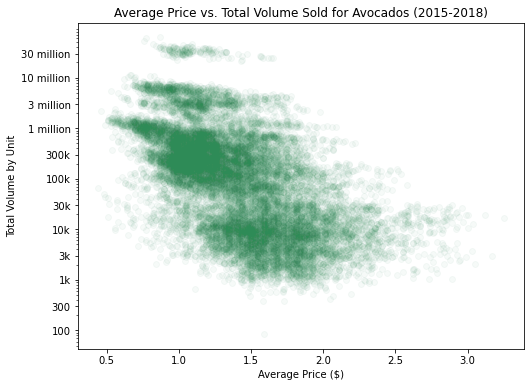

In [10]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "sub-slide"
    }
}

price_volume_scatter(avocados);

## Total Volume and Average Price Over Time

As you can see, the total volume and average price over time have a much clearer relationship! Every time that the total volume is higher, the average price is lower, and vice versa. 

We can also see that a decrease in total volume and increase in average price is happening every autumn, seen after September for all three years. The trend then starts to reverse towards early spring, when we see our highest total volumes and lowest average prices.

In [44]:
# Create rolling average for each size as well as total
# Rolling average creates a smoother, more easily interpretible line for identifying patterns

avocados[ 'rolling_avg_price' ] = avocados.average_price.rolling(8).mean()
avocados[ 'rolling_avg_total' ] = avocados.total_volume.rolling(8).mean()

# Sort by date
avocados = avocados.sort_values('date')

In [12]:
def rolling_avg_plot(var):
    # Create subplot
    fig, axes = plt.subplots(ncols = 1, nrows=2, figsize = [10,10])


    # Create line plot of rolling average for each size as well as total
    sb.lineplot(data = avocados, x=var, y = 'rolling_avg_price', ci=None, color='salmon', ax=axes[0])
    sb.lineplot(data = avocados, x=var, y = 'rolling_avg_total', ci=None, color='seagreen', ax=axes[1])

    # Add labels and title
    axes[0].set_ylabel('8 Week Rolling Average of Average Price($)')
    axes[0].set_xlabel('')
    axes[0].set_title('8 Week Rolling Average of Price ($) of Avocados (2015-2018)')

    # Add labels and title
    axes[1].set_ylabel('8 Week Rolling Average of Total Volume')
    axes[1].set_xlabel('')
    axes[1].set_title('8 Week Rolling Average of Total Volume Sold (2015-2018)')

    # Format y ticks
    plt.yticks([0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6, 1.2e6, 1.4e6], 
               ['0', '200k', '400k', '600k', '800k', '1 million', '1.2 million', '1.4 million']);

    # Set x limits
    axes[0].set_xlim(avocados[var].min(), avocados[var].max())
    axes[1].set_xlim(avocados[var].min(), avocados[var].max());

    # Set x ticks
    axes[0].set_xticks([1, 13, 26, 39, 52, 65, 78, 91, 104, 117, 130, 143, 156, 169])
    axes[0].tick_params(labelrotation=15)
    axes[1].set_xticks([1, 13, 26, 39, 52, 65, 78, 91, 104, 117, 130, 143, 156, 169])
    axes[1].tick_params(labelrotation=15);

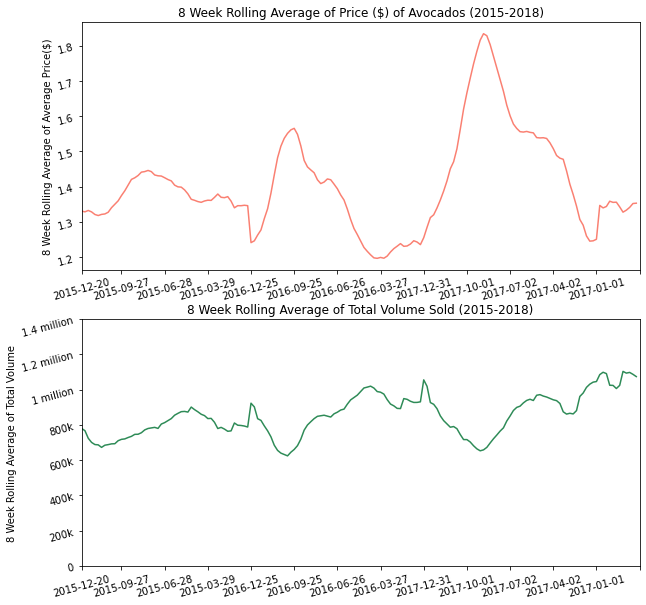

In [13]:
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "sub-slide"
    }
}
rolling_avg_plot('date');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 839372 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
